# CPE 695 HW 2

##### Aaron Vo
##### Feburary 4th 2024

[44 points] Write a program to find the coefficients for a linear regression model for the dataset
provided (data2.txt). Assume a linear model: y = w<sub>0</sub> + w<sub>1</sub>*x. You need to

1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), and use Python to implement the following methods to find the coefficients, Normal equation, and, Gradient Descent using batch AND stochastic modes respectively:
   
   a) Split dataset into 80% for training and 20% for testing. 
   
   b) Plot MSE vs. iteration of each mode for both training set and testing set; compare batch and stochastic modes in terms of accuracy (of testing set) and speed of convergence. (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.)  
   
   c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.

Please implement the algorithms by yourself and do NOT use the fit() function of the library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Column Names
columns = ['X', 'Y']


# Retrieve the data using pandas and create a x and y column dataset
df = pd.read_csv("data2.txt", header=None, names=columns)
df.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


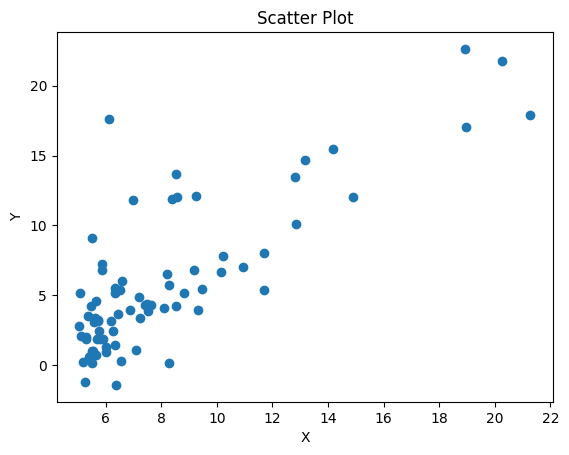

In [2]:
from sklearn.model_selection import train_test_split

# Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df['X'], df['Y'], test_size=0.2, shuffle=True)
# Create a scatter plot from DataFrame
plt.scatter(X_train, Y_train)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

# Display the plot
plt.show()

In [3]:
# Find the normal equation
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y_train)
print(f'Coefficients: {theta_best}')

Coefficients: [-3.58925333  1.16570952]


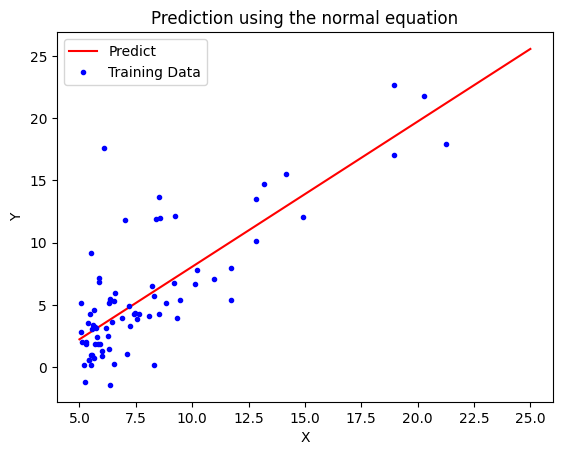

In [4]:
X_new = np.array([[5], [25]])
X_new_b = np.c_[np.ones(X_new.shape[0]), X_new]
Y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, Y_predict, "r-", label='Predict')
plt.plot(X_train, Y_train, "b.", label='Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction using the normal equation')
plt.legend()
plt.show()

In [5]:
def mean_squared_error(X,Y,theta):
    m = len(Y)
    prediction = X.dot(theta)
    error = (prediction - Y) ** 2
    return (1/(2*m)) * np.sum(error)

In [13]:
def reshape(X, Y):
    m = len(Y)
    X = np.append(np.ones((m, 1)), X.values.reshape(m, 1), axis=1)
    Y = Y.values.reshape(m, 1)
    return X, Y

## Batch Gradient Descent

In [14]:
def batch_gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    history = {'mse': [], 'theta': []}
    for i in range(iterations):
        prediction = X.dot(theta)
        error = X.T.dot(prediction - Y)
        theta -= (learning_rate/m) * error
        
        history['theta'].append(theta)
        
        # Calculate MSE for set
        history['mse'].append(mean_squared_error(X, Y, theta))

    return theta, history

Batch Gradient Descent Training Coefficients: [[-1.69981437]
 [ 0.98252368]]
MSE: 6.125493290262054
Batch Gradient Descent Testing Coefficients: [[0.01856503]
 [0.82269209]]
MSE: 4.956438331941198


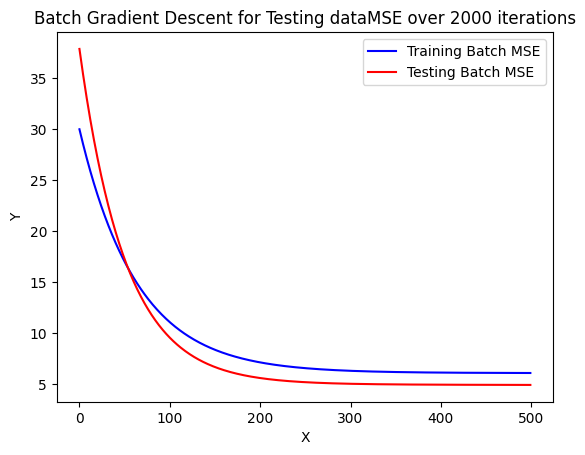

In [34]:
learning_rate = 0.0001
iterations = 500

X_reshape, Y_reshape = reshape(X_train, Y_train)
theta_batch_training, history_batch_training = batch_gradient_descent(X_reshape, Y_reshape, np.zeros((2,1)), learning_rate, iterations)
print("Batch Gradient Descent Training Coefficients:", theta_batch_training)
print("MSE:", history_batch_training['mse'][-1])

X_test_reshape, Y_test_reshape = reshape(X_test, Y_test)
theta_batch_test, history_batch_test = batch_gradient_descent(X_test_reshape, Y_test_reshape, np.zeros((2,1)), learning_rate, iterations)
print("Batch Gradient Descent Testing Coefficients:", theta_batch_test)
print("MSE:", history_batch_test['mse'][-1])

plt.plot(np.arange(iterations), history_batch_training['mse'], '-b', label='Training Batch MSE')
plt.plot(np.arange(iterations), history_batch_test['mse'], '-r', label='Testing Batch MSE')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Batch Gradient Descent for Testing dataMSE over 2000 iterations')
plt.show()

## Stochastic Gradient Descent

In [35]:
def stochastic_gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    mse = np.zeros(X.shape[0])
    history = {'iteration': [], 'mse': [], 'theta': []}    
    for iteration in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            
            Xi = X[random_index:random_index+1]
            Yi = Y[random_index:random_index+1]
            
            prediction = Xi.dot(theta)
            error = prediction - Yi
            theta -= (learning_rate / m) * (Xi.T.dot(error))
            history['theta'].append(theta)
            mse[i] = mean_squared_error(Xi, Yi, theta)
            
        # Calculate MSE for set by getting the average cost for each iteration
        history['mse'].append(np.mean(mse))
        
    return theta, history

Stochastic Gradient Descent Training Coefficients: [[-0.95745376]
 [ 0.89767079]]
MSE: 4.893028899743398
Stochastic Gradient Descent Testing Coefficients: [[-1.70588445]
 [ 0.96786912]]
MSE: 5.053499490728926


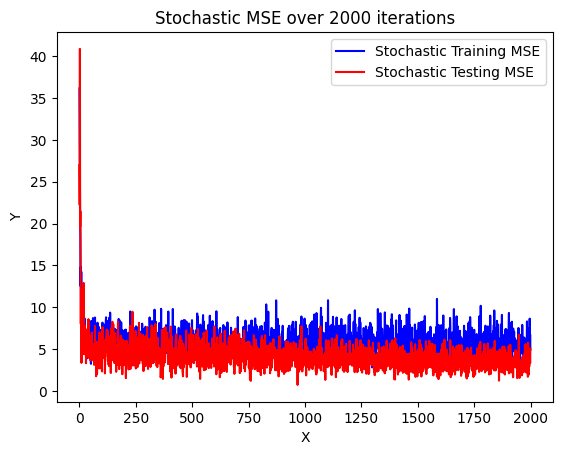

In [36]:
learning_rate = 0.001
iterations = 2000

X_reshape, Y_reshape = reshape(X_train, Y_train)
theta_stochastic_training, history_stochastic_training = stochastic_gradient_descent(X_reshape, Y_reshape, np.zeros((2,1)), learning_rate, iterations)
print("Stochastic Gradient Descent Training Coefficients:", theta_stochastic_training)
print("MSE:", history_stochastic_training['mse'][-1])


X_test_reshape, Y_test_reshape = reshape(X_test, Y_test)
theta_stochastic_testing, history_stochastic_testing = stochastic_gradient_descent(X_test_reshape, Y_test_reshape, np.zeros((2,1)), learning_rate, iterations)
print("Stochastic Gradient Descent Testing Coefficients:", theta_stochastic_testing)
print("MSE:", history_stochastic_testing['mse'][-1])


plt.plot(np.arange(iterations), history_stochastic_training['mse'], '-b', label='Stochastic Training MSE')
plt.plot(np.arange(iterations), history_stochastic_testing['mse'], '-r', label='Stochastic Testing MSE')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Stochastic MSE over 2000 iterations')
plt.show()

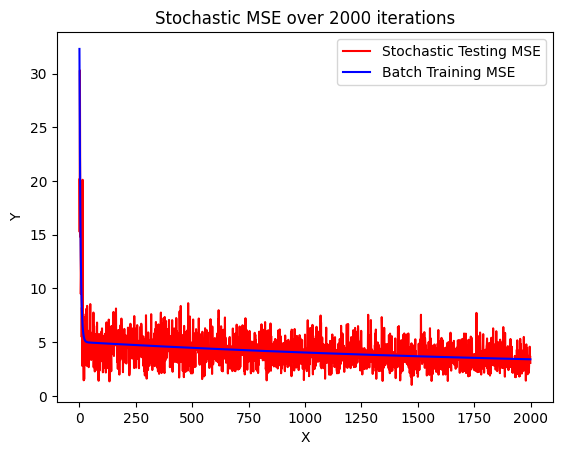

In [37]:
X_test_reshape, Y_test_reshape = reshape(X_test, Y_test)
theta_batch_test, history_batch_test = batch_gradient_descent(X_test_reshape, Y_test_reshape, np.zeros((2,1)), learning_rate, iterations)

X_test_reshape, Y_test_reshape = reshape(X_test, Y_test)
theta_stochastic_testing, history_stochastic_testing = stochastic_gradient_descent(X_test_reshape, Y_test_reshape, np.zeros((2,1)), learning_rate, iterations)

plt.plot(np.arange(iterations), history_stochastic_testing['mse'], '-r', label='Stochastic Testing MSE')
plt.plot(np.arange(iterations), history_batch_test['mse'], '-b', label='Batch Training MSE')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Stochastic MSE over 2000 iterations')
plt.show()

* The decline of batch gradient is more gentle, and the inconsistencies of stochastic gradient decline is more volitle, causing the highs and lows to be relatively large.

* Based on both graphs of SGD and BGD with the testing datasets, we see that the SGD implementation coverges faster and with lower iterations than BGD. From the figure of Batch GD and SGD with its testing dataset, we can see the SGD converge faster than Batch GD.

* Based on this graph, we see that the BGD is more accurate.


In [38]:
def mseOverLearningRate(gradients):
    learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
    mse = []
    title = ''
    if gradients == 'batch':
        print('------------- Batch MSE per each learning rate -------------')
        for learning_rate in learning_rates:
            X_reshape, Y_reshape = reshape(X_train, Y_train)
            _, history = batch_gradient_descent(X_reshape, Y_reshape, np.zeros((2,1)), learning_rate, iterations)
            curr_mse = history['mse'][-1]
            mse.append(curr_mse)
            title = 'Batch MSE vs. learning rate'
            print(f'Learning Rate: {learning_rate}  MSE: {curr_mse}')
            
    
    if gradients == 'stochastic':
        print('------------- Stochastic MSE per each learning rate -------------')
        for learning_rate in learning_rates:
            X_reshape, Y_reshape = reshape(X_train, Y_train)
            _, history = stochastic_gradient_descent(X_reshape, Y_reshape, np.zeros((2,1)), learning_rate, iterations)
            curr_mse = history['mse'][-1]
            mse.append(curr_mse)
            title = 'Stochastic MSE vs. learning rate'

            print(f'Learning Rate: {learning_rate}  MSE: {curr_mse}')

    
    plt.plot(learning_rates, mse, label='Training Set')
    plt.xlabel('Learning Rate')
    plt.ylabel('MSE')
    plt.title(title)
    plt.legend()
    plt.show()


------------- Batch MSE per each learning rate -------------
Learning Rate: 0.01  MSE: 5.010360878725726
Learning Rate: 0.02  MSE: 5.008856647507978
Learning Rate: 0.03  MSE: inf
Learning Rate: 0.04  MSE: nan
Learning Rate: 0.05  MSE: nan
Learning Rate: 0.06  MSE: nan
Learning Rate: 0.07  MSE: nan
Learning Rate: 0.08  MSE: nan
Learning Rate: 0.09  MSE: nan
Learning Rate: 0.1  MSE: nan


/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_7011/3562418855.py:4: RuntimeWarning: overflow encountered in square
  error = (prediction - Y) ** 2
/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_7011/296754758.py:7: RuntimeWarning: invalid value encountered in subtract
  theta -= (learning_rate/m) * error


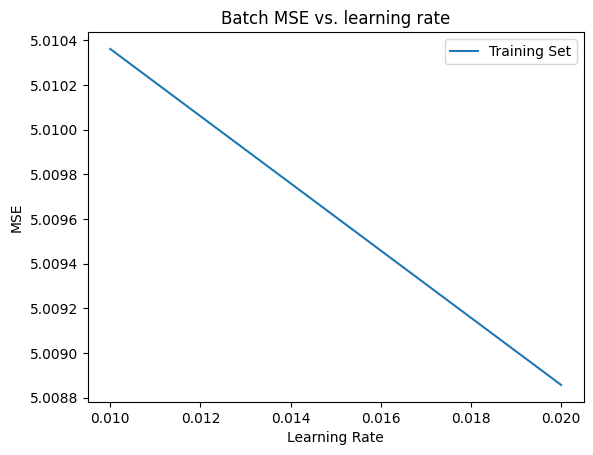

------------- Stochastic MSE per each learning rate -------------
Learning Rate: 0.01  MSE: 4.699474792666694
Learning Rate: 0.02  MSE: 3.2350613353307223
Learning Rate: 0.03  MSE: 6.689565200403757
Learning Rate: 0.04  MSE: 5.315800643038527
Learning Rate: 0.05  MSE: 6.0025902555570445
Learning Rate: 0.06  MSE: 3.6046652512508928
Learning Rate: 0.07  MSE: 4.361792069808398
Learning Rate: 0.08  MSE: 3.03643474320227
Learning Rate: 0.09  MSE: 4.479784441100848
Learning Rate: 0.1  MSE: 4.024988630706708


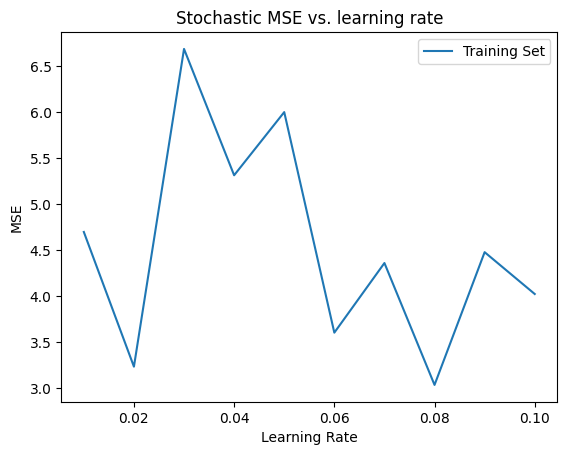

In [39]:
#For Batch
mseOverLearningRate('batch')

#For Stochastic
mseOverLearningRate('stochastic')

0.02 is the best lr in this case as it is when the graph starts to break.